<a href="https://colab.research.google.com/github/Biffy2100/SY-AIDS-SEM-bml/blob/main/PCA_BML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

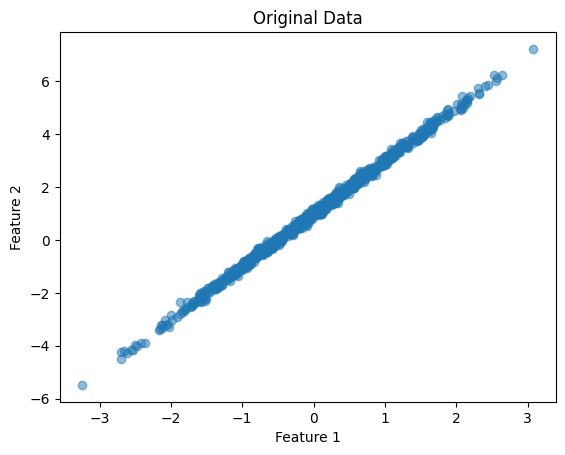

Covariance Matrix:
 [[1.001001   0.99969938]
 [0.99969938 1.001001  ]]


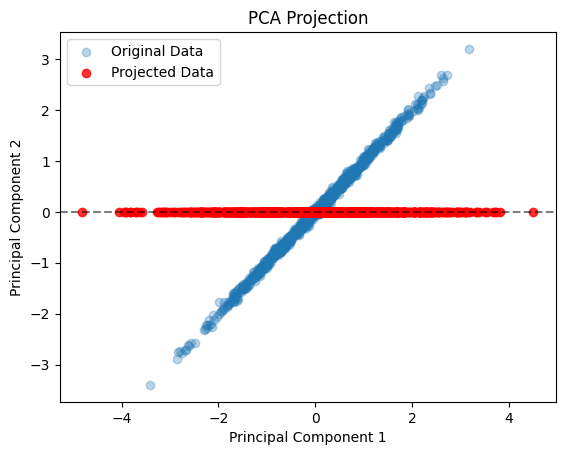

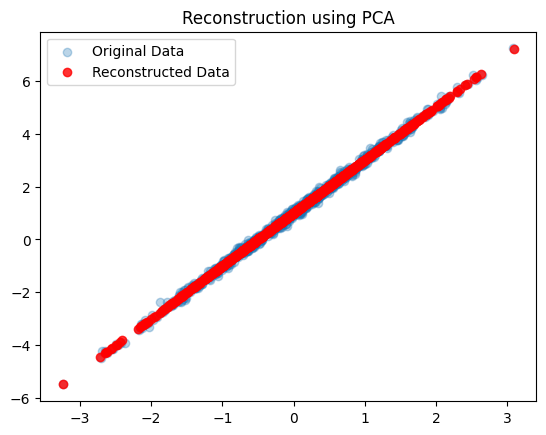

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a random dataset with correlation
np.random.seed(42)
X = np.random.randn(1000, 2)
X[:, 1] = 2 * X[:, 0] + 1 + 0.1 * np.random.randn(1000)  # Fixed array size issue

# Plot original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data")
plt.show()

# Step 2: Standardize the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Step 3: Compute covariance matrix
cov_matrix = np.cov(X_normalized.T)
print("Covariance Matrix:\n", cov_matrix)

# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 5: Sort eigenvalues and eigenvectors
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Step 6: Select the top k principal components
k = 1  # Reduce to 1D
W = eigenvectors[:, :k]

# Step 7: Transform the data
X_pca = X_normalized @ W

# Step 8: Visualize the PCA-transformed data
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], alpha=0.3, label="Original Data")
plt.scatter(X_pca, np.zeros_like(X_pca), color='red', alpha=0.8, label="Projected Data")
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.show()

# Step 9: Reconstruct the original data
X_reconstructed = X_pca @ W.T  # Project back to original space
X_reconstructed = (X_reconstructed * X_std) + X_mean  # Denormalize

# Plot reconstruction
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="Original Data")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], color='red', alpha=0.8, label="Reconstructed Data")
plt.legend()
plt.title("Reconstruction using PCA")
plt.show()


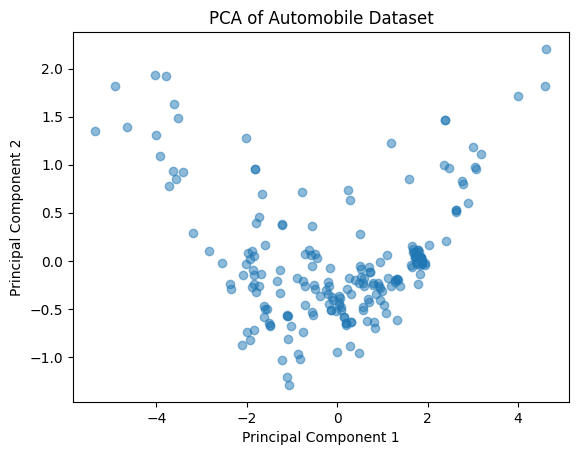

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the automobile dataset with error handling
df = pd.read_csv('/content/Automobile_data[1].csv', na_values=['?'])

# Select numerical features for PCA
numerical_features = ['horsepower', 'city-mpg', 'highway-mpg', 'price']
X = df[numerical_features].values

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # or strategy='median'
X = imputer.fit_transform(X)

# Step 1: Standardize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_normalized)

# Step 3: Visualize the PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Automobile Dataset")
plt.show()

# (Optional) Step 4: Reconstruct the data (for demonstration)
X_reconstructed = pca.inverse_transform(X_pca)
X_reconstructed = scaler.inverse_transform(X_reconstructed)

# ... (Further analysis or visualization using X_pca or X_reconstructed) ...

https://www.kaggle.com/datasets/toramky/automobile-dataset?resource=download